In [1]:
import evalFunctions as ef
import os
import json
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from pyvis.network import Network
import networkx as nx

In [2]:
stop_words = set(stopwords.words('english'))

pathlist = []
for i in range(0,7):
    filename_source = 'sentenceswithnames'+str(i)+'.txt'
    filepath_source = os.path.join('Data','RESULTS',filename_source)
    filename_target = 'unigram_mtx'+str(i)+'.txt'
    filepath_target = os.path.join('Data','RESULTS',filename_target)
    pathlist.append(filepath_target)  
    if not os.path.exists(filepath_target):
        # Statistischee Analysen gesamter Text
        with open(filepath_source,'r',encoding='utf-8') as f:
            content = f.read()
        # Sätze erstellen
        sents = nltk.sent_tokenize(content) # Output is a list of sentences
        print(len(sents))
        # print(type(sents))
        # print(sents)
        unigrammtx = ef.unigramMatrix(sents)
        print(len(unigrammtx))
        with open(filepath_target,'w',encoding='utf-8') as f:
            for word in unigrammtx:
                f.write(word)
                f.write('\n')

filepath_master = os.path.join('Data','RESULTS','unigram_mtx.txt')
# if os.path.exists(filepath_master):
if not os.path.exists(filepath_master):
    os.remove(filepath_master)
    print(pathlist)
    with open(filepath_master,'a') as f:
        for filepath in pathlist:
            with open(filepath,'r') as input:
                f.write(input.read())

In [3]:
with open(os.path.join('Data','RESULTS','unigram_mtx.txt'),'r',encoding='utf-8') as f:
    content = f.readlines()
ngram_mtx = []
for line in content:
    ngram_mtx.append(line)

print(len(ngram_mtx))

630316


In [4]:
# Filter auf die Unigramme
uallmtx = ef.ngramFilter(ngram_mtx)

print(type(uallmtx))

<class 'list'>


In [5]:

# Ngramme initialisieren
# print('unimtx')
# unimtx_freq,mtx_bigram = ef.initNgrams(unigrammtx)
print('uallmtx')
uall_fmtxreq,uallmtx_bigram = ef.initNgrams(uallmtx)
# print('unamesmtx')
# unamesmtx_freq,unamesmtx_bigram = ef.initNgrams(unamesmtx)
# print('uadmtx')
# uadmtx_freq,uadmtx_bigram = ef.initNgrams(uadmtx)

uallmtx


610195
0


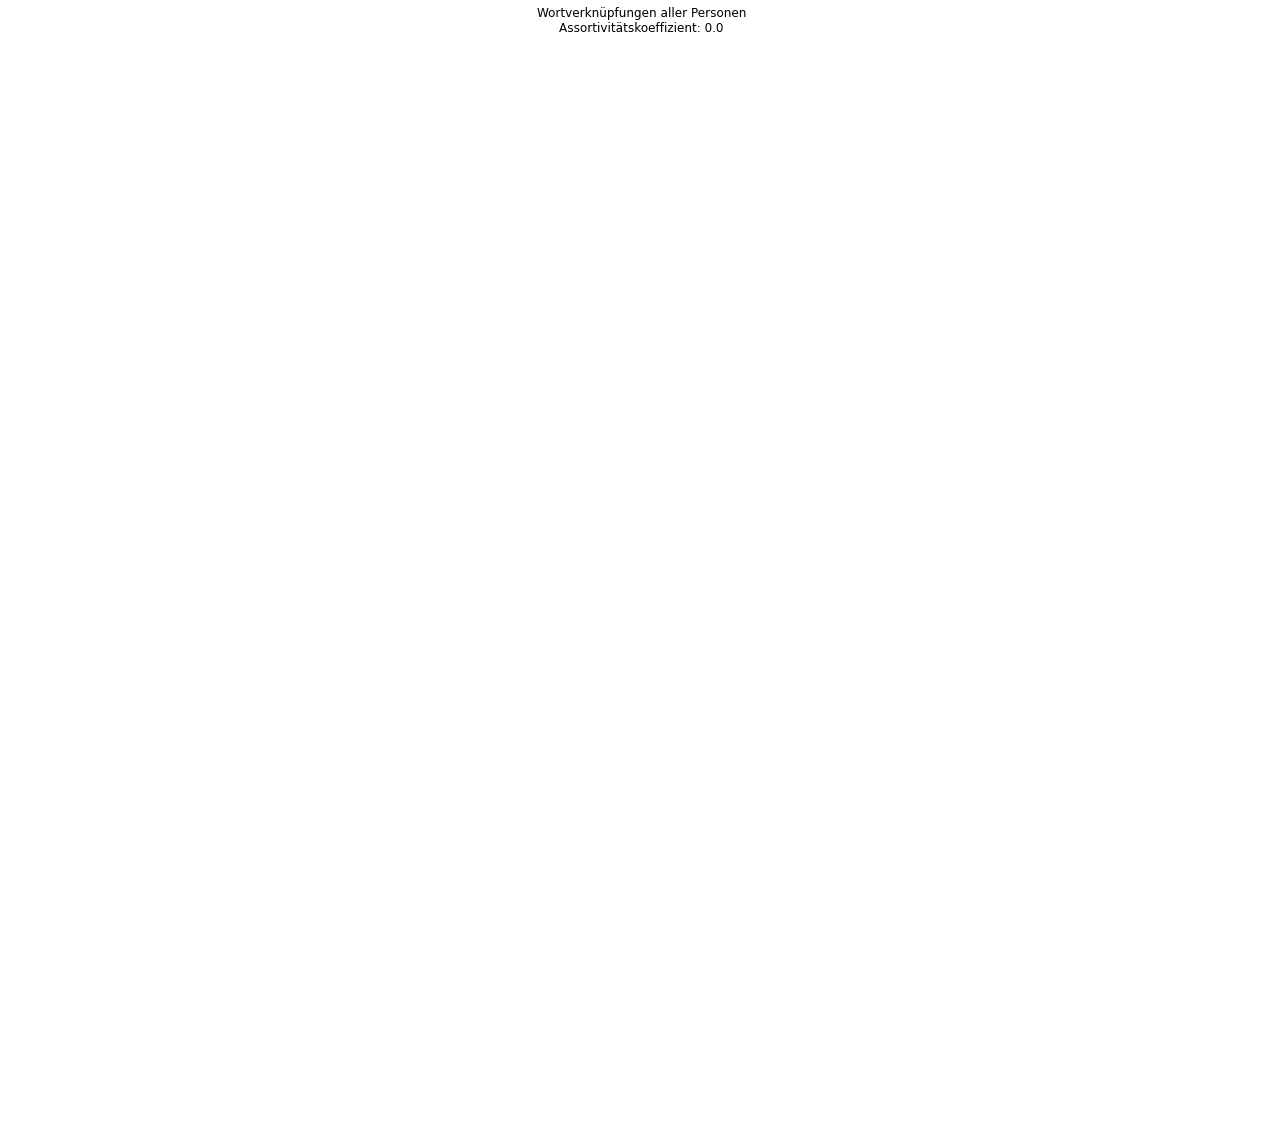

In [6]:
def createNetworkGraph(bigram):
    print('len bigram')
    print(len(bigram))
    
    # Gewichtung
    weight = {}
    # Tuple-Dictionaries
    connection = {}
    connection_f = {}
    connection_m = {}
    # Filter values
    fv_names, fv_adv, fv_adj, female, male, res = ef.getFilterValues(1,0,0,1,1) # funktionuggelt
    # Graphen
    g = nx.Graph()
    g_f = nx.Graph()
    g_m = nx.Graph()
    # Kennzahlen
    weight_of_nodes = []
    # Farben Variablen
    lblue = '#85B4E4'
    dgreen = '#0F8436'
    for tuple in bigram:
        weight = 0
        # TODO Gewichtung überprüfen
        # TODO Graphen umstrukturieren
        if tuple[0] in fv_names and not tuple[1] in fv_names:
            # weiblich
            if tuple[0] in female:
                connection_f.update({tuple:weight})
                weight = connection_f.get(tuple)
                weight += 1
                connection_f.update({tuple:weight})
            # männlich
            if tuple[0] in male:
                connection_m.update({tuple:weight})
                weight = connection_m.get(tuple)
                weight += 1
                connection_m.update({tuple:weight})
            # allgemein
            connection.update({tuple:weight})
            weight = connection.get(tuple)
            weight += 1
            connection.update({tuple:weight})
        if tuple[1] in fv_names and not tuple[0] in fv_names:
            # weiblich
            if tuple[0] in female:
                n_tuple = (tuple[1],tuple[0])
                connection_f.update({n_tuple:weight})
                weight = connection_f.get(n_tuple)
                weight += 1
                connection_f.update({n_tuple:weight})
            # männlich
            if tuple[0] in male:
                n_tuple = (tuple[1],tuple[0])
                connection_m.update({n_tuple:weight})
                weight = connection_m.get(n_tuple)
                weight += 1
                connection_m.update({n_tuple:weight})
            # allgemein
            n_tuple = (tuple[1],tuple[0])
            connection.update({n_tuple:weight})
            weight = connection.get(n_tuple)
            weight += 1
            connection.update({n_tuple:weight})
    print('len connection')
    print(len(connection))
    # Alle Personen-Graph
    color_map = []
    l_of_names = []
    l_of_words = []
    for key in connection:
        value = connection.get(key)
        g.add_node(key[0], cluster='noun')
        g.add_node(key[1], cluster='ad')
        g.add_edge(key[1],key[0],weight=value)
        weight_of_nodes.append(value)
        # Color-Mapping
        if key[1] in fv_names: # Paar aus Namen
            # Name 1 bereits erfasst?
            if not key[0] in l_of_names: # Wenn nein
                color_map.append(dgreen) # TODO Farbe ändern
                l_of_names.append(key[0])
            # Name 2 bereits erfasst?
            if not key[1] in l_of_names: # Wenn nein
                color_map.append(dgreen)
                l_of_names.append(key[1])
        else: # nur 1 Name
            if not key[0] in l_of_names:
                color_map.append(dgreen)
                l_of_names.append(key[0])
            #Color-Mapping für alle anderen Wörter
            if not key[1] in l_of_words: 
                color_map.append(lblue)
                l_of_words.append(key[1])
    # Assortivität-Koeffizient
    cr = nx.attribute_assortativity_coefficient(g,"cluster") # ,nodes=key)
    # Reciprocity
    ### rec = nx.overall_reciprocity(g)
    # Transitivity
    trans = nx.transitivity(g)
    # Clustering
    clu = nx.clustering(g)
    ### avgcluster = nx.average_clustering(g)
    gdeg = nx.generalized_degree(g)
    
    ### print(cr, rec, clu, avgcluster, gdeg)
    # Kennzahlen und Algos
    # print(weight_of_nodes)
    # Graphen darstellen
    fig = plt.figure(figsize=(50,20))
    subax1 = plt.subplot(122)
    nx.draw(g, node_color=color_map, edge_color ='grey', with_labels=True)
    subax1.set_title(f"Wortverknüpfungen aller Personen\nAssortivitätskoeffizient: {cr}") #\nReciprocity: {rec}")
    # plt.savefig('wordconnectivity_women.png')
    # Frauen-Graph
    color_map = []
    l_of_names = []
    l_of_words = []
    weight_of_nodes = []

# wordnet = nltk.pywordnet

createNetworkGraph(uallmtx_bigram)